# Introduction

This is a project notebook that'll run a basic analysis for machine learning / classification techniques using some python libraries.  Although there are a variety of python libraries for this, this notebook will focus on a few widely popular libraries (scikit-learn, pandas, numpy, matplotlib, pytorch).  Feel free to take this notebook and adapt this for your purposes.

# Machine Learning Basics in a Nutshell

There are main tasks in machine learning break down into :

* Classification - Separating incoming data into two or more categories (e.g. is this image a hot dog or not)
* Regression - Given a set of inputs, predict a new value (e.g. how much will a house sell for if it has 2 bedrooms)

Generally, classification involves sorting inputs into different categories and regression tasks involve predicting a value.  

For this project we will use a [kaggle](https://www.kaggle.com/competitions) [competition](https://www.kaggle.com/c/titanic) to predict the which passengers on the Titanic survived.  We are given several CSV (comma separated value) files with information about passengers and whether they survived or not.  Our task is to use this information to generate a model that will predict whether a given passenger survived or not. We also have a validation set that we can use to test our model.  Finally, we can submit a csv file to kaggle to see how our model compares with others.  See [this page](https://www.kaggle.com/alexisbcook/titanic-tutorial) for detailed instructions on doing this and a tutorial guiding you through this process.



The first step is to import the python modules needed to create and test our models.  We'll import a few other modules in order to visualize our data as well.  We'll be looking at using two different models, a logistic regression classifier and a neural network classifier.  These are the two basic techniques used in machine learning.  To get a model that works well, you'll probably need to move past this and use other techniques such as bayesian classification or decision trees. 

*So without further ado, let's import all the things:*

In [12]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


Now setup variables to hold the locations of our data.  Note the submission_set holds information about passengers that our model needs to generate predictions for and which we need to submit to kaggle to get our model graded.

In [2]:
import pathlib
train_set = pathlib.Path.cwd() / "data" / "train.csv"
submission_set = pathlib.Path.cwd() / "data" / "test.csv"

Import the two sets as pandas dataframes

In [3]:
train_df = pd.read_csv(train_set)
test_df = pd.read_csv(submission_set)

Now let's look at our data briefly before doing anything with it. 

In [4]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


We'll need to refer to the kaggle descriptions to properly decode the columns.  In general, understanding and cleaning your data sets is probably **90%** of the work required to do machine learning. Luckily kaggle has already cleaned the data set so we just need to properly decode it. The coding for the dataset is as follows:

| Variable | Definition	Key|
| -------- | -------------- |
| survival | Survival	0 = No, 1 = Yes|
| pclass | Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd |
|sex | Sex |
| Age |	Age in years |
| sibsp |	# of siblings / spouses aboard the Titanic |
| parch |	# of parents / children aboard the Titanic |
| ticket |	Ticket number |
| fare | Passenger fare |
| cabin | Cabin number |
| embarked |	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton |

Note that missing data shows up as NaN values. 

Now let's visualize the data a bit to get a sense of what may be happening in our data set.

In [5]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
train_df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(train_df.Survived, train_df.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
train_df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(train_df.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
train_df.Age[train_df.Pclass == 1].plot(kind='kde')    
train_df.Age[train_df.Pclass == 2].plot(kind='kde')
train_df.Age[train_df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
train_df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(train_df.Embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

Text(0.5, 1.0, 'Passengers per boarding location')

## Logistic Classification

Okay, let's try to create a models using linear, ridge, and lasso regularization to make some predictions about who the survivors are.  Since most of us have seen James Cameron's Titanic, let's use a model inspired by the movie. For our model, we'll assume that survival  depends on the passenger class (i.e. rich people in first class got first dibs on spots in the life boats), the sex of the passenger, fare, age, and age^2.

First, let's setup the model and code to do the logistic classification for us.  We'll use y for labels and X for features that our model will consider.  Also, we'll need to break up our training data into a training set and a test set so that we can test the model parameters while doing machine learning on the parameters.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# convert Sex data to categories
train_df['Sex'] = train_df['Sex'].astype('category')
train_df['Sex_codes'] = train_df['Sex'].cat.codes
train_df['Pclass'] = train_df['Pclass'].astype('category')
train_df['Pclass'] = train_df['Pclass'].cat.codes
train_df['Age2'] = train_df['Age'] ** 2
train_df = train_df.dropna()

y = train_df.Survived
X = train_df[['Pclass', 'Sex_codes', 'Age', 'Fare', 'Age2']]

#  randomly split data into a training and test set.  We'll use 25% of the data for testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# instantiate the model (using the default parameters)
linear = LinearRegression()

# fit the model with data
linear.fit(X_train,y_train)

#
y_pred = linear.predict(X_test)

# use ridge regression

ridge = Ridge(alpha=100) # higher the alpha value, more restriction on the coefficients; 
# restricted and in this case linear and ridge regression resembles
ridge.fit(X_train, y_train)

# use lasso
lasso = Lasso()
lasso.fit(X_train,y_train)



Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Let's look at how well our models did:

In [22]:
from sklearn import metrics

train_score = linear.score(X_train, y_train)
test_score = linear.score(X_test, y_test)
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("\n\n\n")

ridge_train_score = ridge.score(X_train,y_train)
ridge_test_score = ridge.score(X_test, y_test)
print("ridge regression train score:", ridge_train_score)
print("ridge regression test score:", ridge_test_score)
print("\n\n\n")

train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("lasso training score:", train_score) 
print("lasso test score: ", test_score)
print("lasso number of features used: ", coeff_used)

linear regression train score: 0.3193720106198151
linear regression test score: 0.14339487957349498




ridge regression train score: 0.20469500188885192
ridge regression test score: -0.17167598147211158




lasso training score: 0.11871355721339028
lasso test score:  -0.30793272635906105
lasso number of features used:  2


Now let's look at the ROC curve for our model:

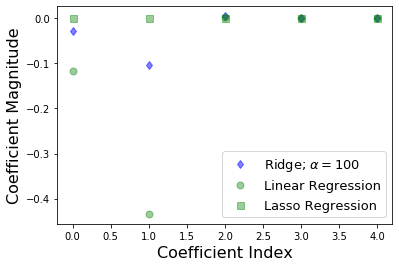

In [25]:
plt.plot(ridge.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(linear.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.plot(lasso.coef_,alpha=0.4,linestyle='none',marker='s',markersize=7,color='green',label='Lasso Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()